In [1]:
# notebook to illustrate text indexing and basic search

In [2]:
# following only used for development, reloads the modules with any code changes
%load_ext autoreload
%autoreload 2

# inline matplotlib charts
%matplotlib inline

In [3]:
# import our text mining toolkit
import text_mining_toolkit as tmt

In [22]:
#cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/recipes/txt/", text_filename_pattern="??.txt")
#cr = tmt.corpus_reader.CorpusReader(directory_of_files="data_sets/mystery_corpus_01/txt/", text_filename_pattern="??.txt")
#cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/iraq_inquiry/txt/", text_filename_pattern="the-report*.txt")
cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/clinton_emails/txt/", text_filename_pattern="C05767*")

content_directory =  data_sets/clinton_emails/txt/
text_filename_pattern =  C05767*
self.documents populated =  513


In [23]:
# first clear index
#tmt.index_search.delete_indices(cr.content_directory)

# for all documents in corpus
for document_name in cr.get_documents():
    #print("processing ", document_name)

    # get document text
    document_text = cr.get_text_by_document(document_name)

    # simplify whitespace (remove newlines)
    b = tmt.text_processing.simplify_whitespace(document_text)

    # only keep alphanumeric characters, removes punctuation
    c = tmt.text_processing.keep_alphanumeric(b)

    # make lowercase
    d = tmt.text_processing.to_lowercase(c)

    # split into words list
    dl = tmt.text_processing.split_text_into_words(d)

    # remove stop words
    #el = tmt.word_processing.remove_stop_words(dl, "./stopwords/minimal-stop.txt")
    
    # update index
    tmt.index_search.create_wordcount_index_for_document(cr.content_directory, document_name, dl)
    pass


In [24]:
# merge document indices into a corpus index
tmt.index_search.merge_wordcount_indices_for_corpus(cr.content_directory)

merging index file ..  data_sets/clinton_emails/txt/C05767000_index.wordcount
merging index file ..  data_sets/clinton_emails/txt/C05767003_index.wordcount
merging index file ..  data_sets/clinton_emails/txt/C05767008_index.wordcount
merging index file ..  data_sets/clinton_emails/txt/C05767009_index.wordcount
merging index file ..  data_sets/clinton_emails/txt/C05767011_index.wordcount
merging index file ..  data_sets/clinton_emails/txt/C05767014_index.wordcount
merging index file ..  data_sets/clinton_emails/txt/C05767016_index.wordcount
merging index file ..  data_sets/clinton_emails/txt/C05767017_index.wordcount
merging index file ..  data_sets/clinton_emails/txt/C05767018_index.wordcount
merging index file ..  data_sets/clinton_emails/txt/C05767021_index.wordcount
merging index file ..  data_sets/clinton_emails/txt/C05767039_index.wordcount
merging index file ..  data_sets/clinton_emails/txt/C05767047_index.wordcount
merging index file ..  data_sets/clinton_emails/txt/C05767048_in

In [25]:
# create relevance index
tmt.index_search.calculate_relevance_index(cr.content_directory)

In [26]:
tmt.index_search.print_index(cr.content_directory)

wordcount_index_file  data_sets/clinton_emails/txt/index.wordcount
                   C05767000  C05767003    ...      C05767997  C05767999
                         6.0        2.0    ...            0.0        3.0
0                        0.0        0.0    ...            0.0        0.0
0000779fd2achtmly        0.0        0.0    ...            0.0        0.0
000077qfd2achtml         0.0        0.0    ...            0.0        0.0
0001                     0.0        0.0    ...            0.0        0.0
000325                   0.0        0.0    ...            0.0        0.0
000508                   0.0        0.0    ...            0.0        0.0
001236                   0.0        0.0    ...            0.0        0.0
002105                   0.0        0.0    ...            0.0        0.0
0030                     0.0        0.0    ...            0.0        0.0

[10 rows x 513 columns]
relevance_index_file  data_sets/clinton_emails/txt/index.relevance
                   C05767000  C0576700

In [28]:
tmt.index_search.search_index(cr.content_directory, "rice")

matching_documents C05767048    0.001600
C05767185    0.002713
C05767187    0.002359
C05767191    0.001284
C05767571    0.006142
C05767574    0.009106
C05767623    0.000534
C05767830    0.002881
C05767885    0.006321
C05767936    0.001182
Name: rice, dtype: float64


[('C05767574', 0.0091061899819988839),
 ('C05767571', 0.0061423828652162277),
 ('C05767936', 0.0011816562317838841),
 ('C05767187', 0.0023590311004091308),
 ('C05767048', 0.0015997360779187227),
 ('C05767185', 0.0027128857654705007),
 ('C05767191', 0.0012842062795126632),
 ('C05767830', 0.0028809406358978767),
 ('C05767885', 0.0063212872205137879),
 ('C05767623', 0.00053368244566632801)]

In [29]:
words_by_relevance = tmt.index_search.get_words_by_relevance(cr.content_directory)
# 20 most common
words_by_relevance.most_common(20)

[('the', 1.6369091289813416),
 ('abedin', 1.1618177697386196),
 ('message', 1.0801543800026108),
 ('original', 1.0573193811572907),
 ('and', 1.0272120862531935),
 ('cheryl', 0.98873804439763979),
 ('huma', 0.98860397703150238),
 ('february', 0.98338997086409596),
 ('january', 0.89980605528779567),
 ('sullivan', 0.89521154004856685),
 ('that', 0.85942879500522729),
 ('mills', 0.81415107698626443),
 ('you', 0.79150291192204536),
 ('call', 0.75972336054437006),
 ('jacob', 0.71712245451200418),
 ('thursday', 0.70854531649874841),
 ('abedinhstategov', 0.70705461678202719),
 ('for', 0.70309421433363906),
 ('will', 0.7013826258381306),
 ('with', 0.66906358480652317)]

In [30]:
# 20 least common
words_by_relevance.most_common()[:-20-1:-1]

[('case', 0.0),
 ('of', 0.0),
 ('f201420439', 0.0),
 ('release', 0.0),
 ('date', 0.0),
 ('unclassified', 0.0),
 ('no', 0.0),
 ('state', 0.0),
 ('department', 0.0),
 ('in', 0.0),
 ('us', 0.0),
 ('doc', 0.0),
 ('', 0.0),
 ('nv', 0.00010666900731456129),
 ('ha', 0.00010666900731456129),
 ('tm', 0.00010766846138650352),
 ('9b', 0.00010766846138650352),
 ('b0', 0.0001230396888394761),
 ('ty', 0.0001230396888394761),
 ('71', 0.0001230396888394761)]

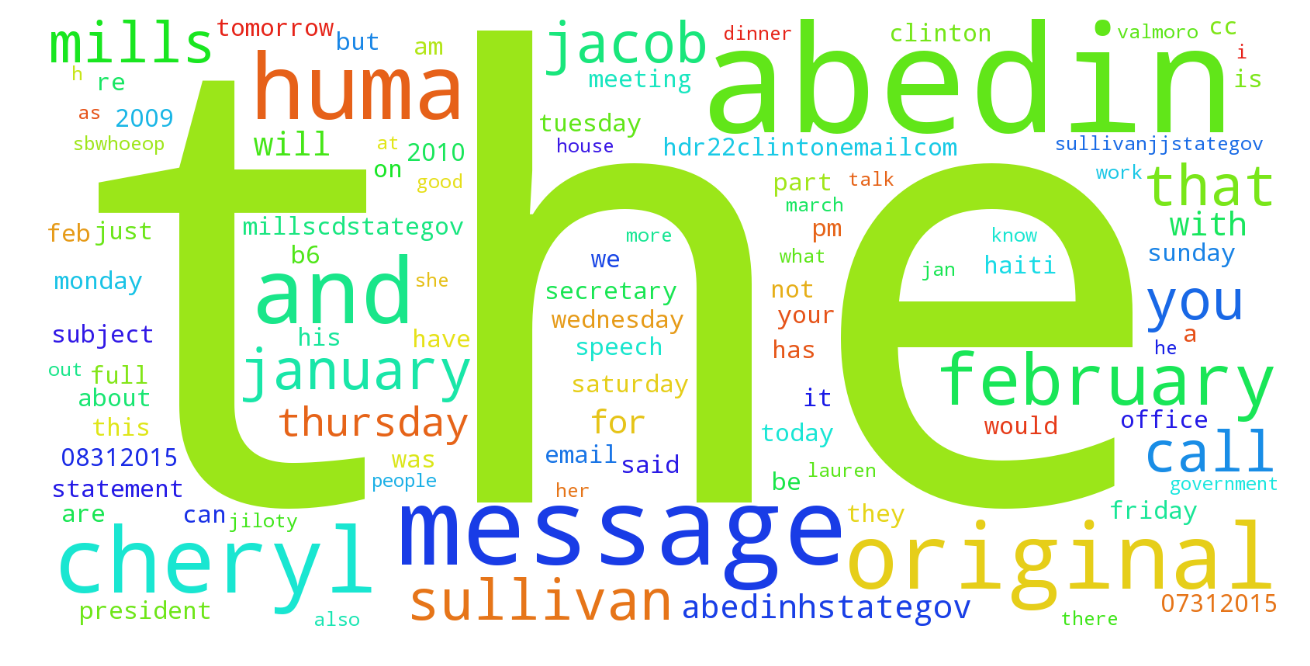

In [31]:
# visualise most relevance words
tmt.visualisation.plot_wordcloud(words_by_relevance)